In [9]:
from matplotlib import pyplot as plt
import os
import sqlite3

DB_PATH = 'CoronaBotDB'
con = sqlite3.connect(DB_PATH+"/KoreaDB.db", isolation_level=None)
con = con.cursor()
con.execute("SELECT * FROM KoreaDB")
print(con.fetchall())

[('2020.11.23', '31,004', '509', '26,539', '3,956', '2,922,135', '271', '73'), ('2020.11.24', '31,353', '510', '26,722', '4,121', '2,946,399', '349', '183'), ('2020.11.25', '31,735', '513', '26,825', '4,397', '2,966,405', '382', '103'), ('2020.11.26', '32,318', '515', '26,950', '4,853', '2,988,046', '583', '125'), ('2020.11.27', '32,887', '516', '27,103', '5,268', '3,009,577', '569', '153'), ('2020.12.6', '36,915', '540', '28,917', '7,458', '3,180,496', '583', '306')]


In [12]:
import requests
import json

def KoreaAPI():
    # Corona API에서 API 데이터 받아오기
    #####
    korea = "http://api.corona-19.kr/korea?serviceKey="
    country = "http://api.corona-19.kr/korea/country?serviceKey="

    key = 'f14954c4a0b04d9a53b1603e20d40e1b8' #API 키(https://api.corona-19.kr/ 에서 무료 발급 가능)
    ###
    print('서버에 데이터를 요청하고 있습니다.. \n\n')

    response = requests.get(korea + key)
    text = response.text
    data = json.loads(text)

    response2 = requests.get(country + key)
    text2 = response2.text
    data2 = json.loads(text2)

    #####
    code = response.status_code
    code2 = response2.status_code

    print(data)
    data.update(data2)

    return data

KoreaAPI()

서버에 데이터를 요청하고 있습니다.. 


{'resultCode': '0', 'TotalCase': '38,755', 'TotalRecovered': '29,650', 'TotalDeath': '552', 'NowCase': '8,553', 'city1n': '서울', 'city2n': '기타', 'city3n': '경기', 'city4n': '대구', 'city5n': '검역', 'city1p': '27.51', 'city2p': '26.12', 'city3p': '21.86', 'city4p': '18.77', 'city5p': '5.73', 'recoveredPercentage': 76.51, 'deathPercentage': 1.42, 'checkingCounter': '71,274', 'checkingPercentage': '2.2', 'caseCount': '38,755', 'casePercentage': '1.2', 'notcaseCount': '3,111,296', 'notcasePercentage': '96.6', 'TotalChecking': '3,221,325', 'TodayRecovered': '349', 'TodayDeath': '3', 'TotalCaseBefore': '242', 'updateTime': '코로나바이러스감염증-19 국내 발생현황 (12.8. 00시 기준)', 'resultMessage': '정상 처리되었습니다.'}


{'resultCode': '0',
 'TotalCase': '38,755',
 'TotalRecovered': '29,650',
 'TotalDeath': '552',
 'NowCase': '8,553',
 'city1n': '서울',
 'city2n': '기타',
 'city3n': '경기',
 'city4n': '대구',
 'city5n': '검역',
 'city1p': '27.51',
 'city2p': '26.12',
 'city3p': '21.86',
 'city4p': '18.77',
 'city5p': '5.73',
 'recoveredPercentage': 76.51,
 'deathPercentage': 1.42,
 'checkingCounter': '71,274',
 'checkingPercentage': '2.2',
 'caseCount': '38,755',
 'casePercentage': '1.2',
 'notcaseCount': '3,111,296',
 'notcasePercentage': '96.6',
 'TotalChecking': '3,221,325',
 'TodayRecovered': '349',
 'TodayDeath': '3',
 'TotalCaseBefore': '242',
 'updateTime': '코로나바이러스감염증-19 국내 발생현황 (12.8. 00시 기준)',
 'resultMessage': '정상 처리되었습니다.',
 'data0_0': '합계',
 'data0_1': '594',
 'data0_2': '38,755',
 'data0_3': '29,650',
 'data0_4': '552',
 'data0_5': '74.75',
 'data0_6': '566',
 'data0_7': '28',
 'data1_0': '서울',
 'data1_1': '214',
 'data1_2': '10,663',
 'data1_3': '7,029',
 'data1_4': '104',
 'data1_5': '109.55',
 '

In [13]:
item_list = []
for row in con.execute('SELECT * FROM KoreaDB'):
    item_list.append({'time': row[0], 'up': int(row[-2]), 'done':int(row[-1])})

In [14]:
item_list

[{'time': '2020.11.23', 'up': 271, 'done': 73},
 {'time': '2020.11.24', 'up': 349, 'done': 183},
 {'time': '2020.11.25', 'up': 382, 'done': 103},
 {'time': '2020.11.26', 'up': 583, 'done': 125},
 {'time': '2020.11.27', 'up': 569, 'done': 153},
 {'time': '2020.12.6', 'up': 583, 'done': 306}]

In [19]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))
font_list
# path ='C:\\WINDOWS\\Fonts\\KoPubWorld Dotum Medium.ttf'
# path ='C:\\WINDOWS\\Fonts\\KoPubWorld Batang Medium.ttf'
# path = 'C:\\Windows\\Fonts\\Asia물레방아M.ttf'
path = 'C:\\Windows\\Fonts\\경기천년바탕OTF_Regular.otf'
fontprop = fm.FontProperties(fname=path, size=14)

버전:  3.0.2
설치 위치:  C:\Users\82108\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\82108\.matplotlib
캐시 위치:  C:\Users\82108\.matplotlib
0


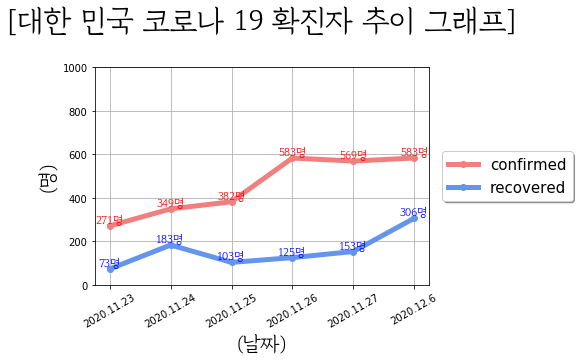

In [23]:
fig1 = [i['time'] for i in item_list]
fig2 = [i['done'] for i in item_list]
fig3 = [i['up'] for i in item_list]

colors = ['cornflowerblue', 'lightcoral']

ax1 = plt
ax1.rc('font', family='NanumGothic')
ax1.rc('axes', unicode_minus=False)
ax1.plot([i['time'] for i in item_list], [i['up'] for i in item_list], marker = 'o', color = 'lightcoral',  linewidth = 5, label='confirmed')

for i, v in enumerate(fig1):
    ax1.text(v, fig3[i], str(fig3[i])+'명',                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
            fontproperties=fontprop,
             color='red',
             fontsize = 12,
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom). 
ax1.rcParams['axes.unicode_minus'] = False
ax1.rcParams['font.family'] = path
ax1.plot(fig1, fig2, marker = 'o', color = 'cornflowerblue', linewidth = 5, label='recovered')
ax1.rc('font')
for i, v in enumerate(fig1):
    ax1.text(v, fig2[i], str(fig2[i])+'명',               # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
            fontproperties=fontprop,
             color='blue',
             fontsize = 12,
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom).    
ax1.xticks(rotation=30)


plt.title('[대한 민국 코로나 19 확진자 추이 그래프]\n',fontproperties=fontprop, fontsize=30)
ax1.xlabel('(날짜)', fontproperties=fontprop, fontsize = 20)
ax1.ylabel('(명)', fontproperties=fontprop, fontsize = 20)
ax1.ylim(0,1000)
ax1.grid(True)
ax1.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), shadow = True, fontsize = 15)
ax1.savefig('CoronaBotDB/1.png', facecolor='#eeeeee', bbox_inches='tight')
ax1.show()

<Figure size 432x288 with 0 Axes>